In [31]:
import pandas as pd
import matplotlib.pyplot as plt

import folium
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

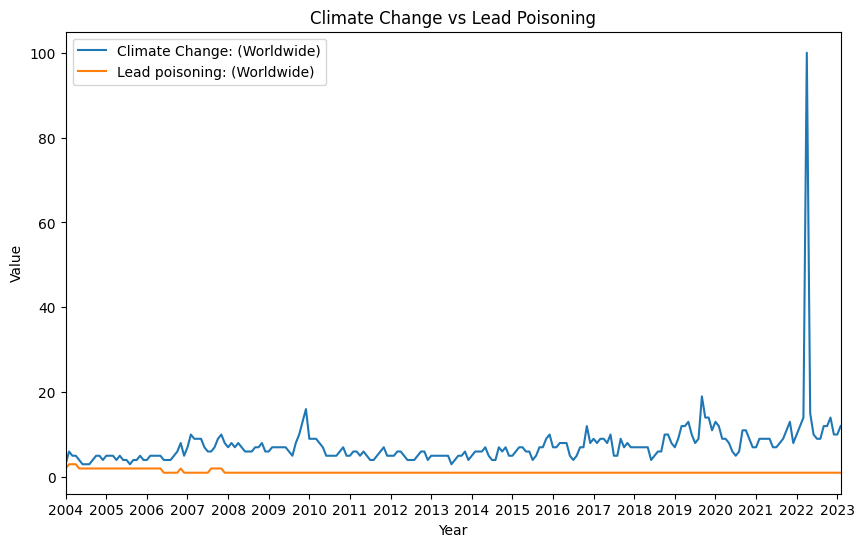

In [32]:
lpvcc = pd.read_csv('datasets/lead_poisoning_vs_climate_change.csv')

# Convert the 'Month' column to a datetime object
lpvcc['Month'] = pd.to_datetime(lpvcc['Month'], format='%Y-%m')

# Convert the columns to numeric data types
lpvcc[['Climate Change: (Worldwide)', 'Lead poisoning: (Worldwide)']] = lpvcc[['Climate Change: (Worldwide)', 'Lead poisoning: (Worldwide)']].apply(pd.to_numeric, errors='coerce')

# Set the 'Month' column as the DataFrame index
lpvcc.set_index('Month', inplace=True)

# Create a line plot
ax = lpvcc.plot(kind='line', figsize=(10, 6))

# Set x-tick labels to show only the years
years = pd.date_range(start='2004', end='2023', freq='YS')
ax.set_xticks(years)
ax.set_xticklabels([year.strftime('%Y') for year in years])
ax.set_title('Climate Change vs Lead Poisoning')

plt.ylabel('Value')
plt.xlabel('Year')
plt.show()

In [33]:
# Import the blood level concentration dataset
blc = pd.read_csv("./datasets/lead-blood-usa-children.csv")

# Print the data
print(blc)

             Entity  Code  Year  Blood lead concentration (1-5 year olds)
0   95th percentile   NaN  1978                                      29.0
1   95th percentile   NaN  1990                                      12.0
2   95th percentile   NaN  1993                                       9.7
3   95th percentile   NaN  2000                                       7.0
4   95th percentile   NaN  2002                                       5.8
5   95th percentile   NaN  2004                                       5.1
6   95th percentile   NaN  2006                                       3.8
7   95th percentile   NaN  2008                                       4.1
8   95th percentile   NaN  2010                                       3.4
9   95th percentile   NaN  2012                                       2.9
10  95th percentile   NaN  2014                                       2.2
11  95th percentile   NaN  2016                                       2.8
12           Median   NaN  1978       

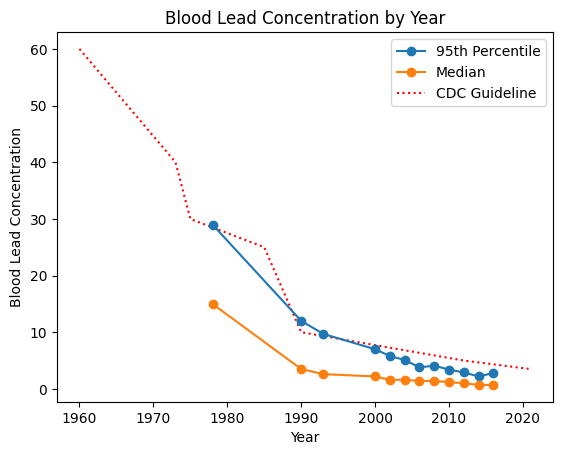

In [47]:
# Filter the data for the 95th percentile
blc_95th = blc[blc['Entity'] == '95th percentile']

# Filter the data for the median
blc_median = blc[blc['Entity'] == 'Median']

# Create a line plot of the 95th percentile blood lead concentration by year
plt.plot(blc_95th['Year'], blc_95th['Blood lead concentration (1-5 year olds)'], '-o', label='95th Percentile')

# Create a line plot of the median blood lead concentration by year
plt.plot(blc_median['Year'], blc_median['Blood lead concentration (1-5 year olds)'], '-o', label='Median')

# Add the CDC guideline to the plot
cdc = [60, 40, 30, 25, 10, 5, 3.5]
cdc_years = [1960, 1973, 1975, 1985, 1990, 2012, 2021]
plt.plot(cdc_years, cdc, ':', color='red', label='CDC Guideline', zorder=0)

# Add labels and title to the plot
plt.xlabel('Year')
plt.ylabel('Blood Lead Concentration')
plt.title('Blood Lead Concentration by Year')
plt.legend()

# Show the plot
plt.show()

In [35]:
# Import the dataset
lpr = pd.read_csv("./datasets/legal-controls-lead-paint.csv")

print (lpr)

            Entity Code  Year lead_paint_regulation
0          Algeria  DZA  2021                   Yes
1        Argentina  ARG  2021                   Yes
2          Armenia  ARM  2021                   Yes
3        Australia  AUS  2021                   Yes
4          Austria  AUT  2021                   Yes
..             ...  ...   ...                   ...
78         Ukraine  UKR  2021                   Yes
79  United Kingdom  GBR  2021                   Yes
80   United States  USA  2021                   Yes
81         Uruguay  URY  2021                   Yes
82         Vietnam  VNM  2021                   Yes

[83 rows x 4 columns]


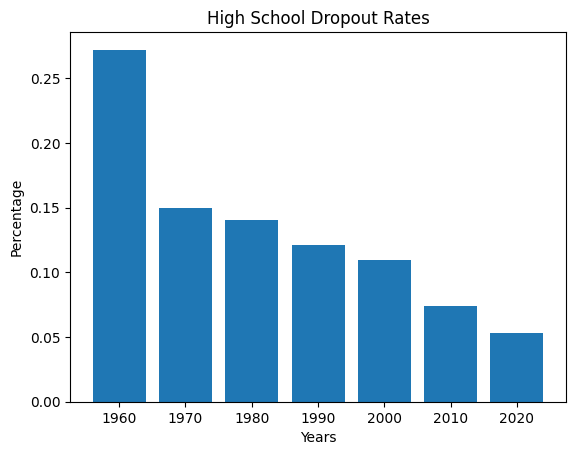

In [36]:
data = pd.read_csv('datasets/high_school_dropout_rate_usafacts.csv')

#  Set start and end years
start = 1960
end = 2021

# Create lists of years and dropout rates
years = []
dropout_rates = []

for year in data.columns[1:]:
    if int(year) % 10 == 0 and int(year) >= start and int(year) <= end:
        years.append(year)
        rate = data[year].iloc[0]
        dropout_rates.append(float(rate))

# Create the bar graph
plt.bar(years, dropout_rates)

# Set the title and labels
plt.title("High School Dropout Rates")
plt.xlabel("Years")
plt.ylabel("Percentage")

# Show the graph
plt.show()

In [37]:
geolocator = Nominatim(user_agent="geoapiExercises")

latitudes = []
longitudes = []

for entity in lpr["Entity"]:
    location = geolocator.geocode(entity)
    latitudes.append(location.latitude)
    longitudes.append(location.longitude)

lpr["Latitude"] = latitudes
lpr["Longitude"] = longitudes

In [38]:
# Create a folium map object centered around the mean coordinates of the data
mean_lat = lpr["Latitude"].mean()
mean_lon = lpr["Longitude"].mean()
m = folium.Map(location=[mean_lat, mean_lon], zoom_start=2)

# Add markers for each country
for i, row in lpr.iterrows():
    folium.Marker(
        location=[row["Latitude"], row["Longitude"]],
        popup=f"{row['Entity']}, {row['Year']}",
        tooltip=f"{row['Entity']}: {row['lead_paint_regulation']}",
        icon=folium.Icon(color="green"),
    ).add_to(m)

# Save the map to an HTML file
m.save("map.html")

In [40]:
display(m)

In [50]:
from allCountries import all_countries
countries_in_lpr = lpr["Entity"].tolist()

remaining_countries = [country for country in all_countries if country not in countries_in_lpr]

In [42]:
# Get the geo-coordinates for the countries where there's no legal control
geolocator = Nominatim(user_agent="myGeocoder")

for country in remaining_countries:
    try:
        location = geolocator.geocode(country)
        if location is None:
            import pycountry
            capital = pycountry.countries.get(name=country).capital
            location = geolocator.geocode(capital)
        folium.Marker(
            location=[location.latitude, location.longitude],
            popup=f"{country}, No legal control",
            tooltip=f"{country}: No legal control",
            icon=folium.Icon(color="red"),
        ).add_to(m)
    except:
        pass

# Using try and except makes us loose some data points so this needs to be fixed in the future. 
# Currently, geolocator and pycounty both couldnt parse some countries as valid countries and
# so we had to implement a jank temporary solution.

In [43]:
display(m)

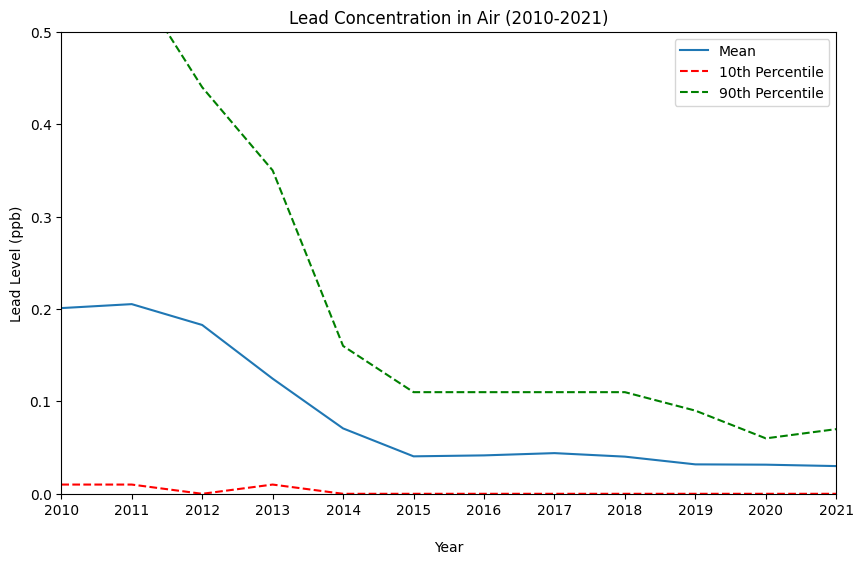

In [44]:
# Load the data from the file
ld = pd.read_csv('./datasets/LeadNational.csv')

# Convert the Year column to a datetime object
ld['Year'] = pd.to_datetime(ld['Year'], format='%Y')

# Create a line plot
ax = ld.plot(x='Year', y='Mean', kind='line', figsize=(10, 6))

# Add the 10th and 90th percentile lines
ld.plot(x='Year', y='10th Percentile', kind='line', ax=ax, color='red', linestyle='--')
ld.plot(x='Year', y='90th Percentile', kind='line', ax=ax, color='green', linestyle='--')

# Set y-axis limits to show all data points
ax.set_ylim(bottom=0, top=0.5)

# Set x-axis label position
ax.xaxis.set_label_coords(0.5, -0.1)

# Set x-axis limits
ax.set_xlim(pd.to_datetime('2010-01-01'), pd.to_datetime('2021-01-01'))

# Set x-tick labels to show only the years
years = pd.date_range(start='2010-01-01', end='2021-01-01', freq='YS')
ax.set_xticks(years)
ax.set_xticklabels([year.strftime('%Y') for year in years])

# Add a title and axis labels
plt.title('Lead Concentration in Air (2010-2021)')
plt.xlabel('Year')
plt.ylabel('Lead Level (ppb)')

# Add a legend
plt.legend(['Mean', '10th Percentile', '90th Percentile'])

plt.show()

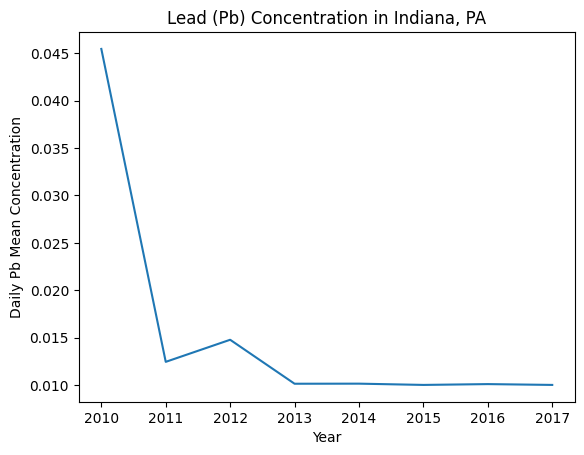

In [45]:
# Load data from csv
df = pd.read_csv("datasets/ad_viz_plotval_data.csv")

# Convert date column to datetime format
df["Date"] = pd.to_datetime(df["Date"])

# Extract year from date column and create a new column
df["Year"] = df["Date"].dt.year

# Group data by year and calculate the mean of Daily Pb Mean Concentration
df_grouped = df.groupby("Year")["Daily Mean Pb Concentration"].mean()

# Create the plot
plt.plot(df_grouped.index, df_grouped.values)
plt.title("Lead (Pb) Concentration in Indiana, PA")

plt.xlabel("Year")
plt.ylabel("Daily Pb Mean Concentration")

plt.show()

In [46]:
import plotly.express as px
import pandas as pd

data = {'STATE': ['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VI', 'VT', 'WA', 'WI', 'WV', 'WY'], 
        'Out of LTO Pb emissions (tons)': [5.86, 5.96, 5.68, 12.71, 34.48, 6.93, 2.01, 0.26, 0.75, 24.44, 6.67, 1.23, 2.50, 3.83, 8.18, 5.03, 4.08, 2.49, 5.53, 6.34, 3.88, 2.03, 7.82, 5.76, 3.46, 4.10, 2.40, 6.60, 1.90, 1.97, 1.54, 4.15, 2.75, 2.65, 8.88, 10.49, 5.11, 5.30, 0.72, 0.40, 4.50, 2.03, 4.76, 21.52, 2.66, 4.46, 0.23, 0.78, 10.56, 6.91, 1.27, 0.94]}
df = pd.DataFrame(data)

# create the map
fig = px.choropleth(df, 
                    locations='STATE', 
                    color='Out of LTO Pb emissions (tons)', 
                    locationmode='USA-states', 
                    color_continuous_scale='reds',
                    title='Highest Lead emissions from Planes per State (tons)',
                    scope='usa')
fig.show()